1. train.csv / test.csv : 타이타닉 탑승자들 중 일부의 인적 정보와 생존 여부 데이터
 - PassengerID : 탑승객 고유 아이디
 - Survival : 탑승객 생존 유무 (0: 사망, 1: 생존)
 - Pclass : 등실의 등급
 - Name : 이름
 - Sex : 성별
 - Age : 나이
 - Sibsp : 함께 탐승한 형제자매, 아내, 남편의 수
 - Parch : 함께 탐승한 부모, 자식의 수
 - Ticket :티켓 번호
 - Fare : 티켓의 요금
 - Cabin : 객실번호
 - Embarked : 배에 탑승한 항구 이름 ( C = Cherbourn, Q = Queenstown, S = Southampton)
 
 2. survived 예측값
 - Pclass(등실 등급), Sex(성별), Age(나이), Sibsp(함꼐 탑승한 형제자매, 아내, 남편의 수), Parch(함께 탑승한 부모, 자식의 수) 정도 예측

In [87]:
import pandas as pd

In [88]:
import numpy as np

In [89]:
import matplotlib.pyplot as plt

In [90]:
train = pd.read_csv('../study_2/train.csv') # 현 디렉토리는 . / 하위 디렉토리는 ..으로 이동

In [91]:
test = pd.read_csv('../study_2/test.csv')

In [92]:
submission = pd.read_csv('../study_2/submission.csv')

In [93]:
print(train.head())
print(test.head())
print(submission.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

In [94]:
print(train.describe())
print(test.describe())
print(submission.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
       PassengerId      Pclass         Age       SibSp       Parch        Fare
co

In [95]:
print(train.describe(include='object'))
print(test.describe(include='object'))

                          Name   Sex    Ticket    Cabin Embarked
count                      891   891       891      204      889
unique                     891     2       681      147        3
top     Andrews, Mr. Thomas Jr  male  CA. 2343  B96 B98        S
freq                         1   577         7        4      644
                                      Name   Sex    Ticket            Cabin  \
count                                  418   418       418               91   
unique                                 418     2       363               76   
top     Hocking, Mr. Samuel James Metcalfe  male  PC 17608  B57 B59 B63 B66   
freq                                     1   266         5                3   

       Embarked  
count       418  
unique        3  
top           S  
freq        270  


In [96]:
print(train.shape) #열, 행 확인
print(test.shape)
print(submission.shape)

(891, 12)
(418, 11)
(418, 2)


In [97]:
print(train.info())
print(test.info())
print(submission.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pcl

### 좌석 등급별 생존율

In [98]:
train[['Pclass','Survived']].groupby('Pclass').mean().sort_values('Survived')

,Survived
Pclass,
3,0.242363
2,0.472826
1,0.629630


In [99]:
print(train[['Age', 'Survived']].groupby('Age').mean().sort_values('Survived'))

       Survived
Age            
61.00       0.0
40.50       0.0
23.50       0.0
20.50       0.0
28.50       0.0
...         ...
0.83        1.0
0.75        1.0
0.67        1.0
53.00       1.0
80.00       1.0

[88 rows x 1 columns]


In [100]:
print(train[['SibSp','Survived']].groupby('SibSp').mean().sort_values('Survived',ascending=False))
print(train[['Parch','Survived']].groupby('Parch').mean().sort_values('Survived', ascending=False))

       Survived
SibSp          
1      0.535885
2      0.464286
0      0.345395
3      0.250000
4      0.166667
5      0.000000
8      0.000000
       Survived
Parch          
3      0.600000
1      0.550847
2      0.500000
0      0.343658
5      0.200000
4      0.000000
6      0.000000


In [101]:
print(train.isna().sum())
print(test.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [102]:
train.dropna(subset=['Embarked'], how='any', inplace=True)

In [103]:
test.dropna(subset=['Fare'], how='any', inplace=True)

In [104]:
train['Age'].fillna(train['Age'].mean(), inplace = True)

In [105]:
test['Age'].fillna(test['Age'].mean(), inplace = True)

### 문자열 바꾸기...? -> 더미변수가 나을 듯

In [31]:
train['Sex'] = train['Sex'].str.replace('male','0')

In [32]:
train['Sex'] = train['Sex'].str.replace('Female', '1')

In [33]:
test['Sex'] = test['Sex'].str.replace('male', '0')
test['Sex'] = test['Sex'].str.replace('Female', '1')

In [35]:
train = train.astype({'Sex':'int64'}) #문자열 숫자로 바꾸는 법 확인
test = test.astype({'Sex':'int64'})

ValueError: invalid literal for int() with base 10: 'fe0'

### 더미변수 만들기

In [106]:
train = pd.get_dummies(train, columns= ['Sex', 'Embarked'], drop_first=True) #drop_first -> 가변수 하나만 사용, K개의 범주형 컬럼 개수에서 K개의 가변수를 만들면 회귀모형에서 문제가 됨

In [107]:
test = pd.get_dummies(test, columns= ['Sex', 'Embarked'], drop_first = True)

In [108]:
print(test)

     PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

           Age  SibSp  Parch              Ticket      Fare Cabin  Sex_male  \
0    34.500000      0      0     

In [37]:
import seaborn as sns

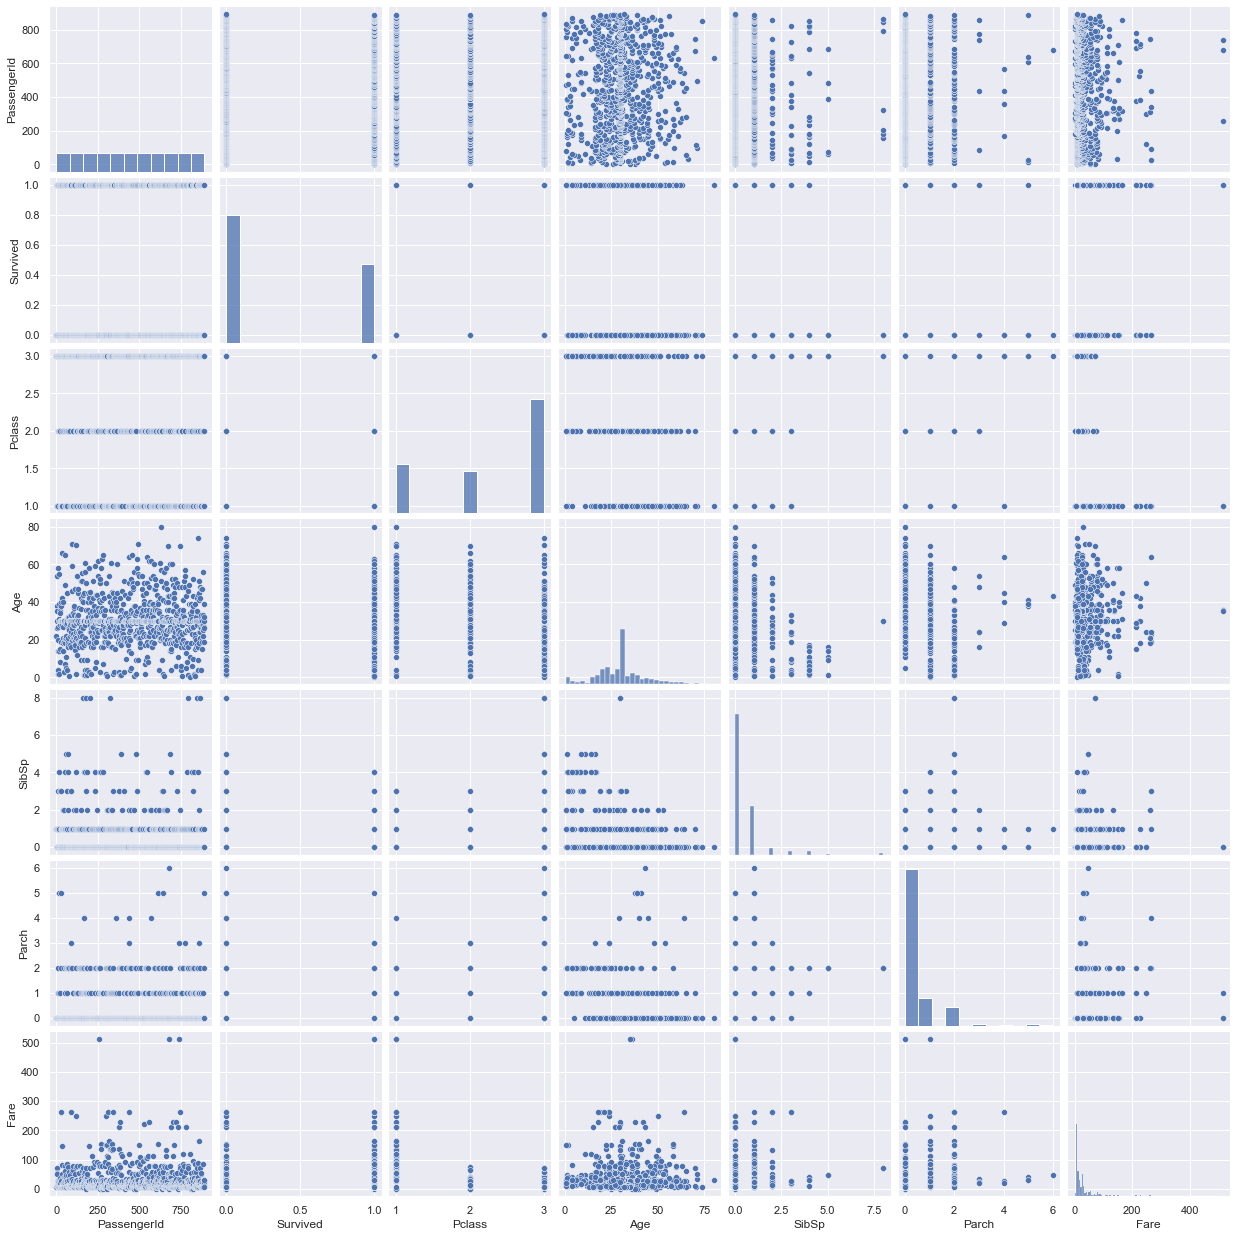

In [73]:
sns.pairplot(train, diag_kind='hist')
plt.show()

In [84]:
print(train.corr())
print(test.corr())

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005028 -0.035330  0.030300 -0.057686 -0.001657   
Survived       -0.005028  1.000000 -0.335549 -0.074673 -0.034040  0.083151   
Pclass         -0.035330 -0.335549  1.000000 -0.327954  0.081656  0.016824   
Age             0.030300 -0.074673 -0.327954  1.000000 -0.231875 -0.178232   
SibSp          -0.057686 -0.034040  0.081656 -0.231875  1.000000  0.414542   
Parch          -0.001657  0.083151  0.016824 -0.178232  0.414542  1.000000   
Fare            0.012703  0.255290 -0.548193  0.088604  0.160887  0.217532   
Sex_male        0.043136 -0.541585  0.127741  0.089434 -0.116348 -0.247508   
Embarked_Q     -0.033694  0.004536  0.220558 -0.012823 -0.026692 -0.081585   
Embarked_S      0.022269 -0.151777  0.076466 -0.021589  0.069438  0.061512   

                 Fare  Sex_male  Embarked_Q  Embarked_S  
PassengerId  0.012703  0.043136   -0.033694    0.022269  
Survived     0.255290 -0.

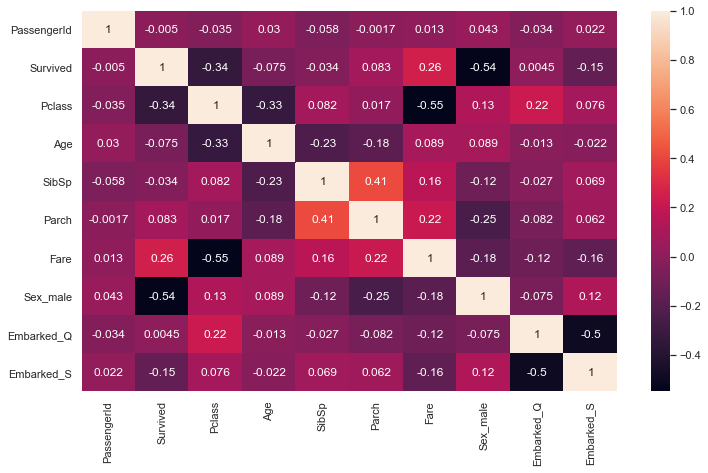

In [81]:
sns.heatmap(train.corr(), annot = True)
sns.set(rc = {'figure.figsize':(12,7)})

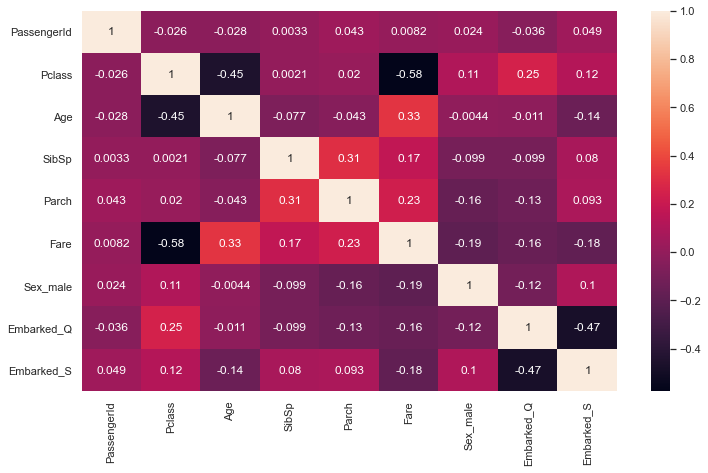

In [85]:
sns.heatmap(test.corr(), annot = True)
sns.set(rc = {'figure.figsize':(12,7)})

### Survived와 상관있는 변수가 적음
 - 살릴 수 있는 변수를 찾아보기(Fare 등)